Let us look at how we can use Qiskit to work out some Machine Learning Models and Algorithms 

  
    
      
      

## 1) Support Vector Machines 

* A [support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine) is a supervised machine learning method that is trained using a dataset and will predict if a particular observation is in a certain class based upon what it has been trained on  
* Quantum SVM uses a feature map to map data points to a quantum circuit. These points are used to maximize the distance between classes.  
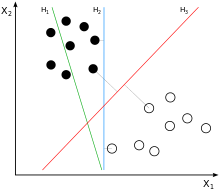
* In the above figure, a plane is found out such that its distance from the nearest points of the two clusters is maximized   
###  Implementation:   
  
  
First, we'll import all the required packages


In [8]:
import numpy as np
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.components.feature_maps import SecondOrderExpansion
from qiskit.aqua.components.multiclass_extensions import (ErrorCorrectingCode,AllPairs,OneAgainstRest)
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import get_feature_dimension
from qiskit import IBMQ

Now, to predict the class of the Unlabelled data, we need to provide Training & Testing data and need to define a backend on which the data would be simulated. We'll find the accuracy of the result along with predicting classes of the Unlabelled data.   

In [ ]:
print('Quantum SVM')
print('-----------\n')

shots = 1024 # Number of times the job will be run on the quantum device 

training_data = {'A': np.asarray([[0.024],[0.035]]),'B': np.asarray([[.834],[1.335]])}
testing_data = {'A': np.asarray([[0.136],[0.636]]),'B': np.asarray([[.977],[1.281]])}

IBMQ.enable_account('Enter API here')
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_qasm_simulator') 
num_qubits = 1
feature_map = SecondOrderExpansion(feature_dimension=num_qubits,depth=2,entanglement='full')
svm = QSVM(feature_map, training_data,testing_data) # Creation of QSVM
quantum_instance = QuantumInstance(backend,shots=shots,skip_qobj_validation=False)

result = svm.run(quantum_instance) # Running the QSVM and getting the accuracy results. 

data = np.array([[0.253],[.413],[1.221],[1.467]]) #Unlabelled data
prediction = svm.predict(data,quantum_instance) # Predict using unlabelled data 

print('Accuracy: ' , result['testing_accuracy'],'\n')
print('Prediction from input data where 0 = Set A and 1 = Set B\n')
print(prediction)

* After inserting your API key in the above code, one will get the following result on the basis of the Unlabelled data. One can get their API token by registering [here]( https://quantum-computing.ibm.com/ )

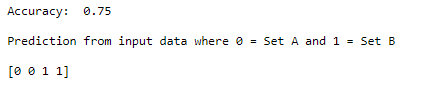

## 2) K-means Clustering Algorithm 

The K-Means algorithm is a distance-based clustering algorithm that uses distance as an evaluation index for similarity, that is, the closer the distance between two objects is, the greater the similarity.  
### Implementation  
* Initially, some random points are chosen as centroids. Distance of all points from these centroids is calculated and they're alloted to the cluster of the centroid which is nearest to them. After that, centroid of each cluster is found from all the alloted points and this is repeated untill the same centroid comes up consecutively. 
* The circuit simulated below is used to compare the distance between different points. It was calculated that the probability of the ancillary qubit being in state '1' is directly related to the euclidean disance between two points, x0,x1.  
* We can use the following circuit iteratively to compare distance between all the points and separate them into clusters using the method proposed above. 

In [9]:
from qiskit import *

Creation of circuit using Qiskit to measure distance between the points

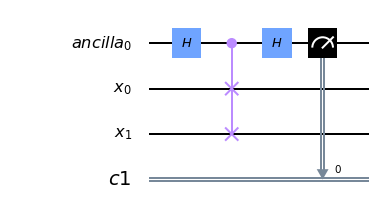

In [10]:
anc = QuantumRegister(1,'ancilla')
qr = QuantumRegister(2,'x')
cr = ClassicalRegister(1)
circuit = QuantumCircuit(anc,qr,cr)
circuit.h(anc)
circuit.cswap(anc[0],qr[0],qr[1])
circuit.h(anc[0])
circuit.barrier
circuit.measure(anc[0],cr[0])
circuit.draw(output = 'mpl')

## 3) Quantum-Classical Neural Networks - Qiskit & PyTorch 

* The concept of Quantum-Clssical Networks can be understood in detail from the qiskit website. A jist of the same has been given in the following notebook:   

[Quantum-classical Neural Networks](/notebooks/Introduction/Qiskit.ipynb)

## References 

* K-Means : https://github.com/qiskit-community/qiskit-community-tutorials/blob/add1163d5caf7d69356b3e355820e9708be82e55/awards/teach_me_qiskit_2018/quantum_machine_learning/1_K_Means/Quantum%20K-Means%20Algorithm.ipynb  
* SVM: https://quantumcomputinguk.org/tutorials/how-to-implement-qsvm-algorithm-on-ibms-quantum-computers-with-qiskit  
* Feature Maps: https://qiskit.org/documentation/apidoc/qiskit.aqua.components.feature_maps.html  
* QSVM: https://github.com/qiskit-community/qiskit-qcgpu-provider/blob/master/examples/aqua/Quantum%20Support%20Vector%20Machine%20-%20Breast%20Cancer%20Prediction.ipynb  
* QSVM Medium: https://medium.com/@aliceliu2004/quantum-support-vector-machines-a-new-era-of-ai-1262dd4b2c7e